<a href="https://colab.research.google.com/github/Casare12/Casare12/blob/main/SUPERVISED_LEARNING_FOR_SALES_OF_EACH_PRODUCT_AT_A_PARTICULAR_STORE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# sales figures of each product at a particular store

In [3]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# load the train and test dataset in pandas dataframe
train=pd.read_csv('/content/train.csv')
test=pd.read_csv('/content/test.csv')

In [5]:
# check number of rows and columns in train dataset
train.shape

(1142, 785)

In [6]:
# print the name of columns in train dataset
train.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [7]:
# check number of rows and columns in test dataset
test.shape

(571, 784)

In [8]:
# print the name of columns in test dataset
test.columns

Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=784)

In [9]:
# combine test and train into one file to perform EDA
train["source"]="train"
test["source"]="test"
data=pd.concat([train,test],ignore_index=True)
print(data.shape)

(1713, 786)


In [10]:
# view the data
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,source
0,1.0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,train
1,0.0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,train
2,1.0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,train
3,4.0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,train
4,0.0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,train


In [11]:
# description
data.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,1142.000000,1713.0,1713.0,1713.0,1713.0,1713.0,1713.0,1713.0,1713.0,1713.0,...,1711.0,1711.0,1711.0,1711.0,1711.0,1711.0,1711.0,1711.0,1711.0,1711.0
mean,4.441331,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,2.875989,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# checking for missen values
data.isnull().sum()

label       571
pixel0        0
pixel1        0
pixel2        0
pixel3        0
           ... 
pixel780      2
pixel781      2
pixel782      2
pixel783      2
source        0
Length: 786, dtype: int64

In [13]:
# printing the unique values
data["label"].unique()

array([ 1.,  0.,  4.,  7.,  3.,  5.,  8.,  9.,  2.,  6., nan])

In [14]:
data["pixel780"].unique()

array([ 0., nan])

In [15]:
data["pixel781"].unique()

array([ 0., nan])

In [16]:
data["label"].value_counts()

2.0    143
7.0    122
4.0    117
0.0    116
9.0    111
8.0    109
6.0    109
1.0    108
5.0    105
3.0    102
Name: label, dtype: int64

In [17]:
data["label"].mode()[0]

2.0

In [18]:
# Replacing missen values with NA
data["label"]=data["label"].fillna(data["label"].mode()[0])

In [19]:
data["pixel780"]=data["pixel780"].fillna(data["pixel780"].mean())

In [20]:
data["pixel781"]=data["pixel781"].fillna(data["pixel781"].mean())

In [21]:
data["pixel782"]=data["pixel782"].fillna(data["pixel782"].mean())

In [22]:
data["pixel783"]=data["pixel783"].fillna(data["pixel783"].mean())

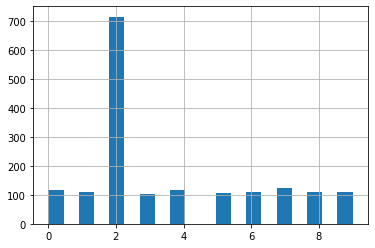

In [24]:
# plotting histogram to reveal the distribution
data["label"].hist(bins=20)

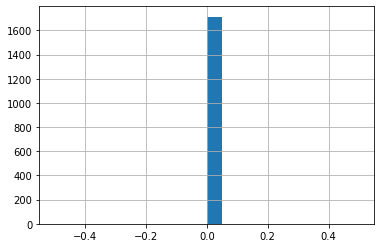

In [25]:
data["pixel783"].hist(bins=20)

In [26]:
# checking for outliers
Q1=data["label"].quantile(0.25) # first quantile

In [27]:
Q3=data["label"].quantile(0.75) # second quantile

In [28]:
# calculating the interquantile range 
IQR=Q3-Q1

In [29]:
# Removing outliers from the data
data_fill=data.query('(@Q1-1.5*@IQR)<=label<=@Q3+1.5*@IQR')

In [30]:
# Displaying the data
data_fill.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,source
0,1.0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,train
1,0.0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,train
2,1.0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,train
3,4.0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,train
4,0.0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,train


In [31]:
data_fill.shape

(1713, 786)

In [32]:
# shape of the original dataset. if thay are the same then it means no outliers
data.shape

(1713, 786)

In [33]:
data=data_fill

In [36]:
# categorizing label data
data["label_bins"]=pd.cut(data["label"],[0.000,0.500,1.00,2.500],labels=["low label","average label","good label"])

In [37]:
# printing count items in the bins file
data["label_bins"].value_counts()

good label       714
average label    108
low label          0
Name: label_bins, dtype: int64

In [38]:
# replacing null values with low label
data["label_bins"]=data["label_bins"].replace(np.nan,"low label",regex=True)

In [39]:
# coding all categorical variables as numeric
le=LabelEncoder()

In [40]:
# Transforming the label bins file
data["label_bins"]=le.fit_transform(data["label_bins"])

In [41]:
data["pixel780"]=le.fit_transform(data["pixel780"])

In [42]:
data["pixel781"]=le.fit_transform(data["pixel781"])

In [43]:
data["pixel782"]=le.fit_transform(data["pixel782"])

In [44]:
data["pixel783"]=le.fit_transform(data["pixel783"])

In [45]:
# looking at the unique items in pixel783
data["pixel782"].unique()

array([0])

In [46]:
# creating dummies
dummy=pd.get_dummies(data["pixel782"])
dummy.head()

,0
0,1
1,1
2,1
3,1
4,1


In [48]:
# dividing the dataset into train and test dataset again
train=data.loc[data["source"]=="train"]
test=data.loc[data["source"]=="test"]
# dropping unneccessary columns
test.drop(["label","source"],axis=1, inplace=True)
train.drop(["source"],axis=1, inplace=True)
# importing the modified version of the file
train.to_csv("train_modified.csv", index=False)
test.to_csv("test_modified.csv", index=False)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [49]:
# reading the modified files
train2=pd.read_csv("train_modified.csv")
test2=pd.read_csv("test_modified.csv")

In [50]:
train2.dtypes

label         float64
pixel0          int64
pixel1          int64
pixel2          int64
pixel3          int64
               ...   
pixel780        int64
pixel781        int64
pixel782        int64
pixel783        int64
label_bins      int64
Length: 786, dtype: object

In [52]:
# creating an independent variable and dependent variable
x_train=train2.drop(["label","pixel780","pixel781"],axis=1)
y_train=train2.label

In [54]:
x_test=test2.drop(["pixel780","pixel781"],axis=1)

In [55]:
x_test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel782,pixel783,label_bins
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1
567,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1
568,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1
569,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1


In [56]:
x_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel782,pixel783,label_bins
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,2
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,2
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,2


In [57]:
from sklearn import model_selection
from sklearn.linear_model import LinearRegression

In [58]:
# creating train and test split
xtrain, ytrain, xtest, ytest = model_selection.train_test_split(x_train,y_train,test_size=0.3,random_state=42)

In [59]:
# fitting linear regression to the training dataset
lin=LinearRegression()

In [67]:
lin.fit(xtrain, ytrain)
print (lin.coef_)
lin.intercept_

ValueError: ignored

In [ ]:
# predicting the test set results
prediction=lin.predict(xtest)
prediction

In [ ]:
import math

In [ ]:
# finding the RMSE for the model
print(math.sqrt(mean_squared_error(ytest, prediction)))

In [ ]:
# ALL CREDIT TO SIMPLILEARN